In [13]:
import os
import sys
import glob
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sys.path.append('/home/mattolm/Bio_scripts/')
sys.path.append('/home/mattolm/Programs/strains_analysis/')

import warnings
warnings.filterwarnings("ignore")

## Run it on a random genome

In [2]:
Gdb = pd.read_csv('/data8/Human/NIH_4/GenomeInventory/FGI_beta/FinalV1/DataTables/FGI_beta_GenomeInformation_v1.csv')

In [43]:
Gdb[(Gdb['infant'] == 'N1_003') & (Gdb['type'] == 'bacteria')].sort_values('taxonomy')

,genome,location,infant,type,taxonomy,original_sample,name
52,dasN1_003_000G1_abawaca.23.fasta.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Actinomyces,N1_003_000G1,N1_003_000G1_bacteria_Actinomyces
51,dasN1_003_000G1_concoct_27.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Atopobium minutum,N1_003_000G1,N1_003_000G1_bacteria_Atopobium_minutum
32,dasN1_003_086G1_abawaca.19.fasta.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Clostridioides difficile,N1_003_086G1,N1_003_086G1_bacteria_Clostridioides_difficile
47,dasN1_003_000G1_concoct_42.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Clostridium,N1_003_000G1,N1_003_000G1_bacteria_Clostridium
48,dasN1_003_000G1_concoct_40.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Clostridium,N1_003_000G1,N1_003_000G1_bacteria_Clostridium__2
34,dasN1_003_052G1_concoct_3.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Clostridium,N1_003_052G1,N1_003_052G1_bacteria_Clostridium
46,dasN1_003_000G1_maxbin2.maxbin.009.fasta.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Clostridium baratii,N1_003_000G1,N1_003_000G1_bacteria_Clostridium_baratii
54,dasN1_003_000G1_concoct_13.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Clostridium celatum,N1_003_000G1,N1_003_000G1_bacteria_Clostridium_celatum
53,dasN1_003_000G1_abawaca.65.fasta.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Corynebacterium,N1_003_000G1,N1_003_000G1_bacteria_Corynebacterium
38,dasN1_003_028G1_maxbin2.maxbin.009.fasta.fa,/data8/Human/Binning/N1_003/drep/delta_N1_003_...,N1_003,bacteria,Dermabacter sp. HFH0086,N1_003_028G1,N1_003_028G1_bacteria_Dermabacter_sp._HFH0086


In [14]:
import strainRepOneSample

In [19]:
GENOME = 'N1_003_022G1_bacteria_Staphylococcus_epidermidis'
fasta = Gdb['location'][Gdb['name'] == GENOME].tolist()[0]
bam = '/data8/Human/NIH_4/GenomeInventory/FGI_beta/FinalV1/Mapping/N1_003.FGIBetaV1.fasta-vs-N1_003_022G1.sorted.bam'

### Run

In [20]:
positions = strainRepOneSample._get_scaffold_positions(None, fasta)

In [23]:
results = strainRepOneSample.run_strain_profiler(bam, positions, min_coverage = 5, min_snp = 3)

Getting read pairs:   0%|          | 1/501 [00:00<00:59,  8.43it/s]

READING BAM: N1_003.FGIBetaV1.fasta-vs-N1_003_022G1.sorted.bam


Finding SNVs ...: 100%|██████████| 501/501 [00:46<00:00, 10.81it/s]


## Parse

In [54]:
def results_to_pandas(fasta, bam, results):
    sample = bam.split("/")[-1].split(".bam")[0]
    genome = fasta.split("/")[-1].split(".")[0]
    
    table = defaultdict(list)
    for read in results['read_to__snvs']:
        table['genome'].append(genome)
        table['sample'].append(sample)
        table['read'].append(read)
        table['snvs'].append(str(len(results['read_to__snvs'][read])))
    d1 = pd.DataFrame(table)

    table = defaultdict(list)
    for snp in results['snvs_frequencies']:
        table['genome'].append(genome)
        table['sample'].append(sample)
        table['snp'].append(snp)
        table['freq'].append(str(results['snvs_frequencies'][snp]))
    d2 = pd.DataFrame(table)
    
    print("alpha_snvs {0}".format(results['alpha_snvs']))
    print("total_read_length {0}".format(results['total_read_length']))
    
    return d1, d2

d1, d2 = results_to_pandas(fasta, bam, results)

alpha_snvs 1452
total_read_length 1414553


## Plot

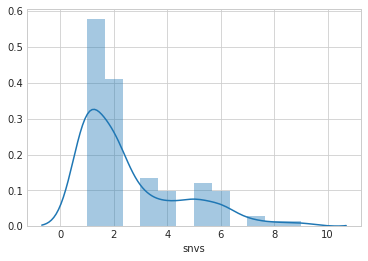

In [55]:
sns.distplot(d1['snvs'].astype(int))
plt.show()

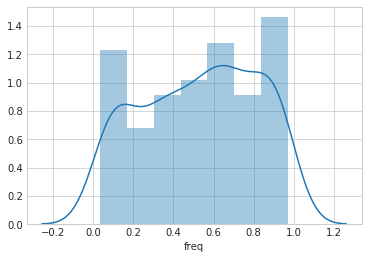

In [56]:
sns.distplot(d2['freq'].astype(float))
plt.show()

## Modify

In [65]:
def results_to_pandas2(fasta, bam, results):
    sample = bam.split("/")[-1].split(".bam")[0]
    genome = fasta.split("/")[-1].split(".")[0]
    
    table = defaultdict(list)
    for read in results['read_to__snvs']:
        snvs = len(results['read_to__snvs'][read])
        for snv in results['read_to__snvs'][read]:
            table['genome'].append(genome)
            table['sample'].append(sample)
            table['read'].append(read)
            table['snv'].append(snv)
            table['read_snvs'].append(snvs)
    d1 = pd.DataFrame(table)

    table = defaultdict(list)
    for snp in results['snvs_frequencies']:
        table['genome'].append(genome)
        table['sample'].append(sample)
        table['snv'].append(snp)
        table['freq'].append(str(results['snvs_frequencies'][snp]))
    d2 = pd.DataFrame(table)
    
    print("alpha_snvs {0}".format(results['alpha_snvs']))
    print("total_read_length {0}".format(results['total_read_length']))
    
    
    d3 = pd.merge(d1, d2, on=['snv', 'sample', 'genome'])
    d3['freq'] = d3['freq'].astype(float)
    
    return d3

d3 = results_to_pandas2(fasta, bam, results)

alpha_snvs 1452
total_read_length 1414553


### Plot

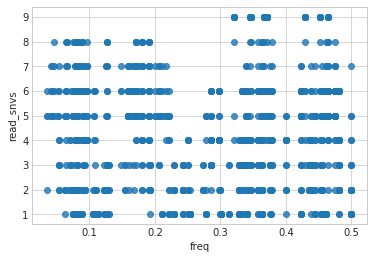

In [66]:
sns.regplot(d3['freq'], d3['read_snvs'], fit_reg=False)
plt.show()

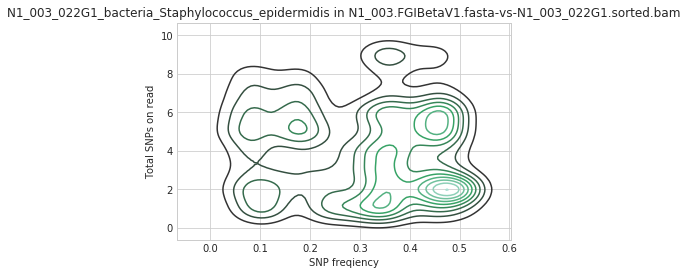

In [70]:
sns.kdeplot(d3['freq'], d3['read_snvs'])
plt.xlabel('SNP freqiency')
plt.ylabel('Total SNPs on read')
plt.title("{0} in {1}".format(GENOME, os.path.basename(bam)))
plt.show()